#### importing necessary packages

In [26]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer

#### reading the csv

In [27]:
df = pd.read_csv("data/all_data.csv")

#### rendering the profile report

In [28]:
# profile = ProfileReport(df, title="Profiling Report", minimal=True)

In [29]:
# profile.to_file('profiling_report.html')

## Training with numerical features

#### sampling data

In [30]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 115)
(61503, 115)
(246008,)
(61503,)


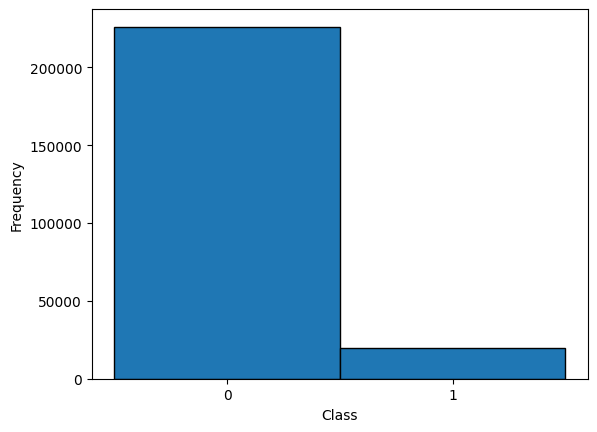

In [31]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

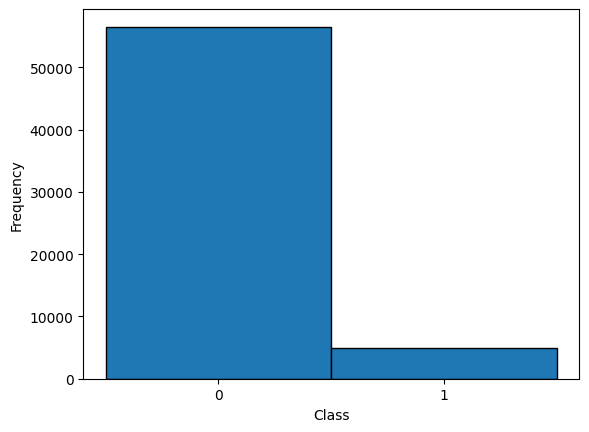

In [32]:
plt.hist(y_test, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Drop non corelated data

In [33]:
X_train['TARGET'] = y_train
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test.select_dtypes(include=['float64', 'int64'])
corr = X_train.corr()
corr

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CREDIT_TYPE_Consumer credit_SUM,CREDIT_TYPE_Consumer credit_MEAN,CREDIT_TYPE_Credit card_SUM,CREDIT_TYPE_Credit card_MEAN,MONTHS_CREDIT_COUNT,MONTHS_CREDIT_SUM,MONTHS_CREDIT_MEAN,MONTHS_CREDIT_MAX,MONTHS_CREDIT_MIN,TARGET
Unnamed: 0,1.000000,0.999999,-0.001402,-0.002336,0.000737,0.001071,0.001140,-0.000801,0.002657,0.001946,...,0.001636,-0.001767,0.003273,0.001544,0.002033,0.001038,-0.000535,0.000985,-0.002330,-0.002207
SK_ID_CURR,0.999999,1.000000,-0.001401,-0.002337,0.000736,0.001073,0.001140,-0.000801,0.002655,0.001948,...,0.001638,-0.001769,0.003274,0.001546,0.002035,0.001036,-0.000536,0.000982,-0.002328,-0.002204
CNT_CHILDREN,-0.001402,-0.001401,1.000000,0.012004,0.002401,0.021200,-0.001731,-0.026412,-0.330948,-0.241732,...,-0.002850,-0.023056,0.000244,-0.001622,0.003200,0.022868,0.018262,0.024999,0.001915,0.020347
AMT_INCOME_TOTAL,-0.002336,-0.002337,0.012004,1.000000,0.143809,0.174736,0.146198,0.068077,-0.024687,-0.058016,...,0.019888,-0.048420,0.052100,0.023738,0.042128,0.045734,0.018176,0.031235,-0.001375,-0.002727
AMT_CREDIT,0.000737,0.000736,0.002401,0.143809,1.000000,0.770163,0.987000,0.101601,0.057428,-0.062508,...,0.023671,-0.063315,0.071982,0.031676,0.054247,0.044635,0.002277,0.021310,-0.013352,-0.030803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MONTHS_CREDIT_SUM,0.001038,0.001036,0.022868,0.045734,0.044635,0.038045,0.046609,0.025940,-0.067652,-0.096378,...,0.303170,-0.223791,0.555504,0.240935,0.447848,1.000000,0.640176,0.900829,0.123875,0.030266
MONTHS_CREDIT_MEAN,-0.000535,-0.000536,0.018262,0.018176,0.002277,0.013701,0.002592,0.039834,-0.119815,-0.094702,...,-0.126103,-0.392005,0.197409,0.396314,-0.036301,0.640176,1.000000,0.728263,0.644932,0.030472
MONTHS_CREDIT_MAX,0.000985,0.000982,0.024999,0.031235,0.021310,0.026520,0.022754,0.032654,-0.097753,-0.104053,...,0.138532,-0.260272,0.407259,0.278468,0.254525,0.900829,0.728263,1.000000,0.164059,0.031487
MONTHS_CREDIT_MIN,-0.002330,-0.002328,0.001915,-0.001375,-0.013352,-0.001854,-0.013732,0.014358,-0.060261,-0.032221,...,-0.164491,-0.257742,-0.040501,0.245665,-0.150473,0.123875,0.644932,0.164059,1.000000,0.010595


In [34]:
corrt = abs(corr['TARGET'])
corrt.sort_values(ascending=True).head(10)

AMT_ANNUITY_SUM                0.000159
AMT_CREDIT_SUM_DEBT_MEAN       0.000940
AMT_REQ_CREDIT_BUREAU_HOUR     0.001215
AMT_REQ_CREDIT_BUREAU_WEEK     0.001596
AMT_CREDIT_MAX_OVERDUE_MIN     0.001661
AMT_CREDIT_MAX_OVERDUE_MEAN    0.001704
AMT_CREDIT_MAX_OVERDUE_MAX     0.001807
CNT_CREDIT_PROLONG_MEAN        0.002087
SK_ID_CURR                     0.002204
Unnamed: 0                     0.002207
Name: TARGET, dtype: float64

drop EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3

In [35]:
# X_train = df_numerical_train.drop(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'TARGET'], axis=1)
# X_test = df_numerical_test.drop(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1'], axis=1)

# X_train = df_numerical_train.drop(['FLAG_DOCUMENT_5', 'NONLIVINGAPARTMENTS_AVG', 'FLAG_EMAIL', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_7', 'TARGET'], axis=1)
# X_test = df_numerical_test.drop(['FLAG_DOCUMENT_5', 'NONLIVINGAPARTMENTS_AVG', 'FLAG_EMAIL', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_7'], axis=1)

In [36]:
X_train.drop('TARGET', axis=1, inplace=True)

#### model training with XGBoost only using numerical data

In [37]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Prepare data
X_train_selected = np.array(X_train)
X_test_selected = np.array(X_test)

stdscl = StandardScaler()
X_train_selected = stdscl.fit_transform(X_train_selected)
X_test_selected = stdscl.transform(X_test_selected)

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred))

[[56347   191]
 [ 4781   184]]


## Training with categorical + numerical features

#### Train/Test Split

In [38]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 115)
(61503, 115)
(246008,)
(61503,)


#### Encoding categorical features

##### function to convert Yes/Y to 1 and No/N to 0 in FLAG_OWN_CAR, FLAG_OWN_REALTY and EMERGENCYSTATE_MODE columns

In [39]:
def encode_bin(X):
    pd.set_option("future.no_silent_downcasting", True)
    
    X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
    X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].astype('float64')
    # print(X['FLAG_OWN_CAR'].head(3))
    
    X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0}) 
    X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].astype('float64')
    # print(X['FLAG_OWN_REALTY'].head(3))
    
    X['EMERGENCYSTATE_MODE'] = X['EMERGENCYSTATE_MODE'].replace({'Yes': 1, 'No': 0})
    X['EMERGENCYSTATE_MODE'] = X['EMERGENCYSTATE_MODE'].astype('float64')
    # print(X_train['EMERGENCYSTATE_MODE'].head(3))
    return X

In [40]:
X_train = encode_bin(X_train)
X_test = encode_bin(X_test)

##### function to raplace nulls in cat cols with 'unknown' for preventing undesired behaviour in one-hot-encoding

In [41]:
def replace_nulls(X):
    categorical = X.select_dtypes(include=['object'])
    cat_cols = categorical.columns.tolist()
    print(cat_cols)
    uniques_sum = 0
    # print('number of unique values in each column and nulls')
    for cat_col in cat_cols:
        unique_cnt = len(categorical[cat_col].unique())
        null_cnt = categorical[cat_col].isna().sum()
        
        if(null_cnt > 0):
            X[cat_col] = X[cat_col].fillna('unknown')
    
        # null_cnt_updated = X_train[cat_col].isna().sum()
        # print(f'{cat_col}:{unique_cnt}, null:{null_cnt_updated}')
        # uniques_sum += unique_cnt
    # print()
    # print(f"total unique value counts:{uniques_sum}")
    return X

In [42]:
X_train = replace_nulls(X_train)
X_test = replace_nulls(X_test)

# X_train = X_train.fillna('unknown')
# X_test = X_test.fillna('unknown')

categorical = X_train.select_dtypes(include=['object'])
cat_cols = categorical.columns.tolist()
print("After replacing nulls in categorical features with 'Unknown' null counts are as follows")
X_train[cat_cols].isna().sum()

['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
After replacing nulls in categorical features with 'Unknown' null counts are as follows


CODE_GENDER                   0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

*`one-hot encoding`*

In [43]:
ohe = OneHotEncoder()
encodded = ohe.fit_transform(X_train[cat_cols])

X_encd = encodded.toarray()
X_train = X_train.drop(cat_cols, axis=1)
X_train = np.array(X_train)

X_train = np.append(X_train, X_encd, axis=1)

In [44]:
X_train.shape

(246008, 226)

In [45]:
encodded = ohe.transform(X_test[cat_cols])
y_encd = encodded.toarray()
X_test = X_test.drop(cat_cols, axis=1)
X_test = np.array(X_test)

X_test = np.append(X_test, y_encd, axis=1)

In [46]:
X_test.shape

(61503, 226)

#### Checking Correlation between the features and the Target

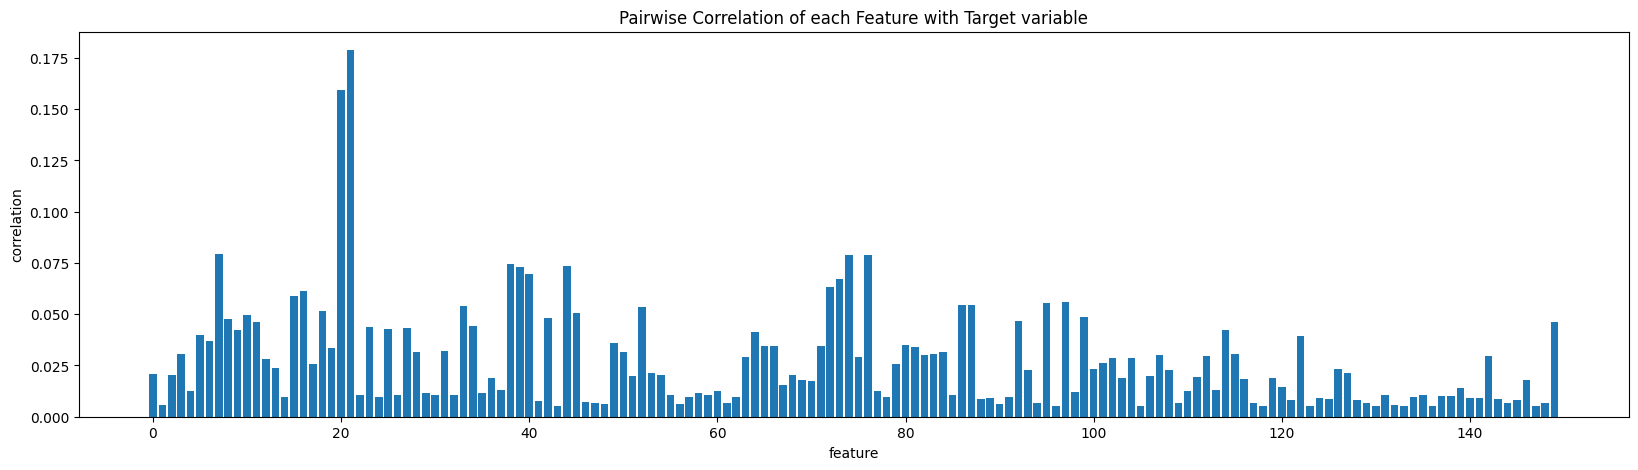

In [47]:
# concatenate x_train and y_train
combined = np.concatenate((X_train, np.array([y_train]).T), axis=1) # both have same dimensions
# convert into a pandas dataframe
x_df = pd.DataFrame(combined)
# rename lastly added one as TARGET
x_df.rename(columns={x_df.columns[-1]:'TARGET'}, inplace=True)
# calculating the correlations with TARGET
corr = x_df.corrwith(x_df['TARGET'])
# take the absolute value
corrt = abs(corr)
# sorting in ascending order
corrt.sort_values(ascending=True)

corrt = corrt[corrt[corrt > 0.005].index]
corrt = corrt[:-1]

# plotting
plt.figure(figsize=(20,5))
plt.bar(np.arange(corrt.shape[0]), corrt)
plt.xlabel('feature')
plt.ylabel('correlation')
plt.title('Pairwise Correlation of each Feature with Target variable')
plt.show()

#### Drop non correlated data

In [48]:
X_train = X_train[:, corrt.index.tolist()]
X_test = X_test[:, corrt.index.tolist()]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 150)
(61503, 150)
(246008,)
(61503,)


#### Replace missing values

In [49]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#### Oversampling

In [50]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

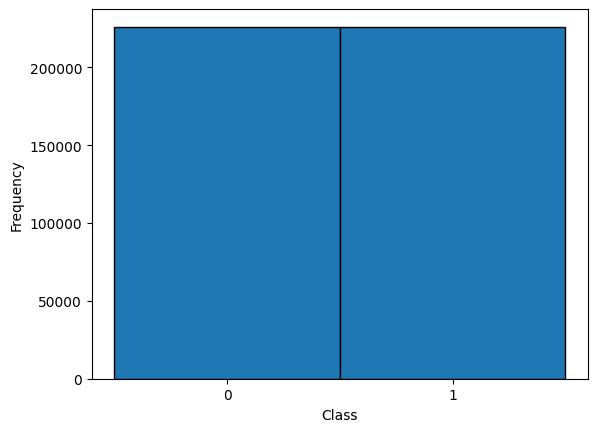

In [51]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Model training with XGBoost with one-hot-encodded features

In [52]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Prepare data
X_train_selected = np.array(X_train)
X_test_selected = np.array(X_test)

stdscl = StandardScaler()
X_train_selected = stdscl.fit_transform(X_train_selected)
X_test_selected = stdscl.transform(X_test_selected)

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56326   212]
 [ 4773   192]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.48      0.04      0.07      4965

    accuracy                           0.92     61503
   macro avg       0.70      0.52      0.51     61503
weighted avg       0.89      0.92      0.89     61503



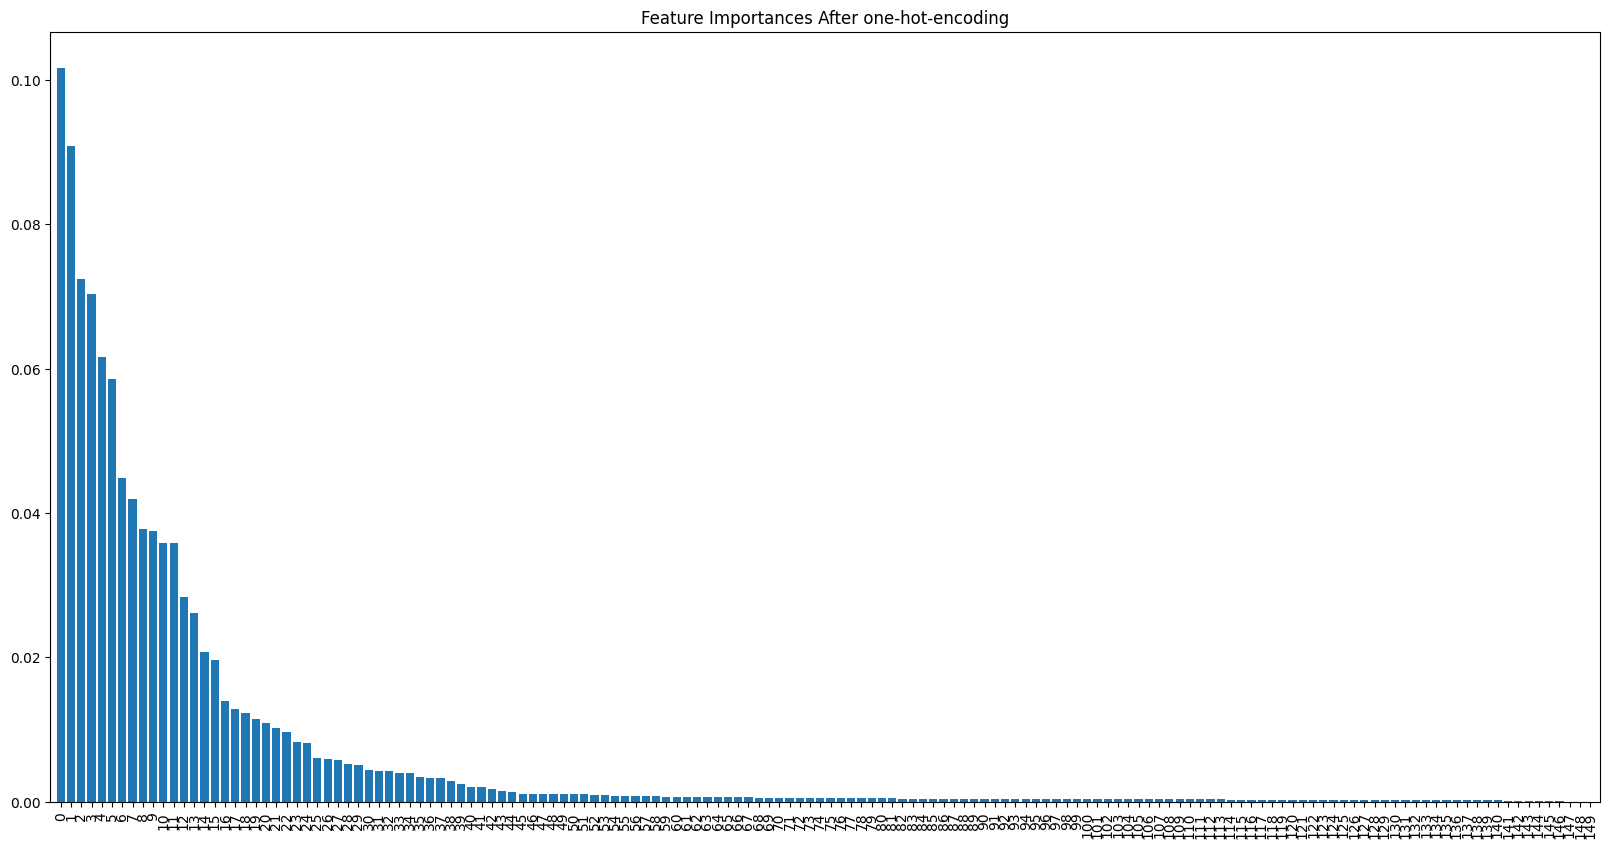

In [54]:
# feature_names = df_correlation_removed.columns
# Get feature importances
importances = model.feature_importances_
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.title("Feature Importances After one-hot-encoding")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()